# Elementary Notions in Statistics

* Main ideas behind probability distributions in general: https://youtu.be/oI3hZJqXJuc
* The normal distribution, clearly explained: https://youtu.be/rzFX5NWojp0

## Random variables

> A _random variable_ is a function that assigns a real value to each outcome from a sample space $\Omega$.

It usually denoted by capital letters: $X: \Omega \to \mathbb{R}$.

In many cases the random variable is effectively just a way to model the output of an experiment as a number.

In a mathematical sense, it is *not random* and *not a variable*. The name makes sense when analysing phenomena from a statistical perspective: it is a variable because it can influence the studied outcome (i.e. temperature and humidity are important variables in analysing precipitation levels) and are random because their values are unpredictable (even if we can assign some probabilities to them, they are effectively outside our control).

Several different random variables can be defined on the same sample space.

### Example

Since random variables are just associations between omega and a number, the simplest way to represent a random variable would be through a dictionary. So for the tossing of a coin, for example, we can have:

In [1]:
omega = set(['H', 'T'])
X = {'H': 1, 'T': -1}
X = dict([('H', 1), ('T',-1)])
print(X['H'])

1


If two random variables are independent, they can be added or multiplied by adding or multiplying their corresponding values:

In [2]:
omega = set(['H', 'T'])
X = {'H': 1, 'T': -1}
Y = {'H': 2, 'T': 3}
Z = {o: X[o]+Y[o] for o in omega} # Z = X + Y
print('Z=X+Y:', Z)
Z = {o: X[o]*Y[o] for o in omega} # Z = X * Y
print('Z=XY:', Z)

Z=X+Y: {'H': 3, 'T': 2}
Z=XY: {'H': 2, 'T': -3}


---
**Give it a try!**

Create two random variables $A, B$ on the same sample space $\Omega=\{"red", "green", "blue"\}$ and add them together.

In [3]:
# Your code here
omega = set(["red", "green", "blue"])
A = {"red" : -1, "green" : 0, "blue" : 1}
B = {"red" : 1, "green" : 5, "blue" : 2}
C = {x : A[x] + B[x] for x in omega}
print(f"C=A+B {C}")


C=A+B {'green': 5, 'blue': 3, 'red': 0}


---

## Discrete random variables

> Let $\Omega$ be a sample space. A _discrete random variable_ is a function $X: \Omega \to \mathbb{R}$ that takes on a finite number of values $a_1, a_2,\dotsc,a_n$ or a countably infinite number of values $a_1, a_2,\dotsc$.

Examples:
* Tossing a coin
* Number of bees in Europe
* How many tries it takes to get a 6 on a die

### Probability mass function (pmf)

> The _probability mass function_ $p$ of a discrete random variable $X$ is the function $p:\mathbb{R} \to [0,1]$ defined by
>
>  $p(a) = P(X = a)=P(\{ \omega \in \Omega | X(\omega) = x\})$ for $-\infty < a < \infty$

**Important property: The sum of the probabilites of all values must be 1.**

<img src="img/random_variable.svg" alt="Random Variable" width="500"/>

*Source: Wikipedia. By Niyumard - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=76473622*

#### Example

In Python, we can create this function using `tools.stats.probability_weighted` from Lab1:

In [4]:
from tools.stats import probability_weighted, WeightedOutcome
from dataclasses import dataclass

@dataclass(frozen=True)
class Outcome(WeightedOutcome):
    weather: str

omega = set([Outcome(weather='Rain', weight=1), 
             Outcome(weather='Sunny', weight=1),
             Outcome(weather='Overcast', weight=3)])
X = {'Rain': -1, 'Sunny': 2, 'Overcast': 3}

def pmf(X, a, omega):
    A = set(o for o in omega if X[o.weather] is a)
    return probability_weighted(A, omega)

pmf(X, 2, omega)

0.2

---
**Give it a try!**

Create a random variable $Y$ that maps the side of a coin to the values 0 and 1 for "Tail" and "Head", respectively. The face corresponding to "Head" is twice as likely to show compared to "Tail". Print the pmf for 0 and 1.

In [5]:
# Your code here
from tools.stats import probability_weighted, WeightedOutcome
from dataclasses import dataclass

@dataclass(frozen=True)
class Outcome(WeightedOutcome):
    coin_side: str

omega = set([Outcome(coin_side='head', weight=2), 
             Outcome(coin_side='tail', weight=1)])
Y = {"head" : 1, "tail" : 0}

def pmf(X, a, omega):
    A = set(o for o in omega if X[o.coin_side] is a)
    return probability_weighted(A, omega)

print(f"P(Y=1) = {pmf(Y, 1, omega)}")
print(f"P(Y=0) = {pmf(Y, 0, omega)}")

P(Y=1) = 0.6666666666666666
P(Y=0) = 0.3333333333333333


---

However, in practice, once a discrete random variable X is introduced, the sample space $\Omega$ is no longer important, because we can now just operate with the values of $X$ instead (sometimes denoted as $k$ or $x$ instead of $a$).

We can plot the pmf for every value of $X$ (or, in other words, for every value of $k$) using `matplotlib.pyplot`:

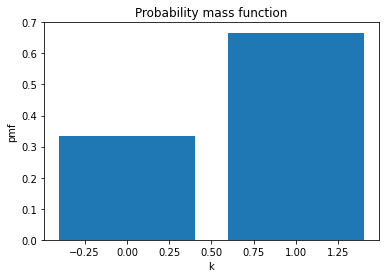

In [6]:
import matplotlib.pyplot as plt

k = sorted(set(Y.values()))
pmf_Y = [pmf(Y, x, omega) for x in k]

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_Y)
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

---
**Give it a try!**

Plot the pmf of a loaded die for which the side 6 is twice as likely as any other.

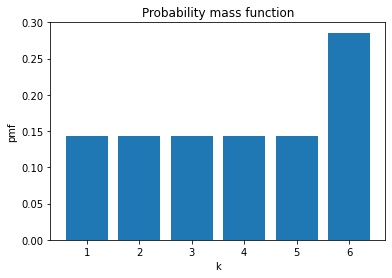

In [7]:
# Your code here
from tools.stats import probability_weighted, WeightedOutcome
from dataclasses import dataclass

@dataclass(frozen=True)
class Outcome(WeightedOutcome):
    die_face : int

omega = set([Outcome(die_face = 1, weight = 1),
             Outcome(die_face = 2, weight = 1),
             Outcome(die_face = 3, weight = 1),
             Outcome(die_face = 4, weight = 1),
             Outcome(die_face = 5, weight = 1),
             Outcome(die_face = 6, weight = 2)
             ])
X = {1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5, 6 : 6}

def pmf(X, a, omega):
    A = set(o for o in omega if X[o.die_face] is a)
    return probability_weighted(A, omega)
    
import matplotlib.pyplot as plt

k = sorted(set(X.values()))
pmf_X = [pmf(X, x, omega) for x in k]

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_X)
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

---

### Bernoulli distribution

Description
: The probability distribution of a single experiment for which
the outcome is one of two possible values.

Example
: Tossing of a (possibly unfair) coin.

Notation
: Bernoully(p); Ber(p)

Parameters
: $0 \leq p \leq 1$

Support (values of X)
: $k \in {0,1}$

pmf
: $\begin{cases} p& \text{if}\ k=1 \\ 1-p& \text{if}\ k=0 \end{cases}$

sometimes also written as $p^k \cdot (1-p)^{1-k}$
  
Mean
: $p$ 

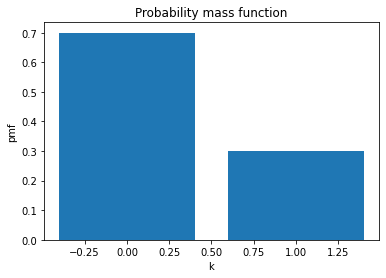

In [8]:
from scipy.stats import bernoulli
p = 0.3
k = [0, 1]
pmf_X = bernoulli.pmf(k, p)

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_X)
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

### Binomial distribution

Description: Having an experiment with two possible outcomes, what is the probability that, after repeating the experiment several times, to obtain an outcome a number of times? (The binomial distribution is actually the Bernoulli distribution repeated a number of times.)

Example: What is the probability of getting $k$ heads when throwing a coin $n$ times consecutively knowing that the probability of getting head is $p$.

Notation: $b(k; n, p)$

Parameters: $n \in \mathbb{N}^*; p \in [0,1]; k \in \mathbb{N}, k \leq n$

pmf: $C_n^k p^k (1-p)^{n-k}$

Mean: $np$

Variance: $np(1-p)$

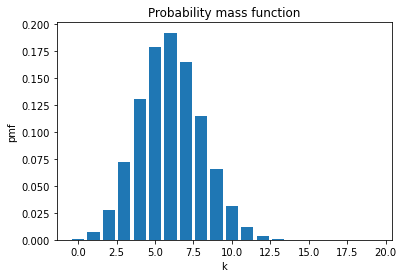

In [9]:
from scipy.stats import binom 
n = 20
p = 0.3
k=range(20)

pmf_X = binom.pmf(k, n, p)

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_X)
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

### Poisson distribution

Description
: Probability of a given number of events occuring in a fixed interval of time or space.

Example
: Number of phone calls $k$ received in a day, given that we expect $\lambda$ calls a day on average.

Notation
: Pois($\lambda$)

Parameters
: $\lambda \in \mathbb{R}^+$

Support
: $k \in \mathbb{N}_0$

pmf
: $\frac{\lambda^ke^{-\lambda}}{k!}$

Mean
: $\lambda$

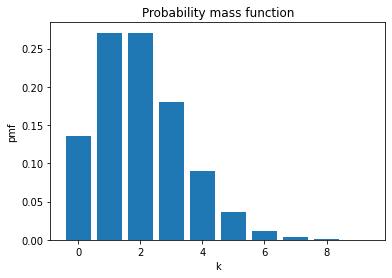

In [10]:
from scipy.stats import poisson
lambda_ = 2
k=range(10)

pmf_X = poisson.pmf(k, lambda_)

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_X)
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

---
**Give it a try!**

Calculate the pmf $p(1)$ for a Poisson distribution of parameter $\lambda = 1$ using `scipy.stats`, then using the formula directly. *Note: constant e is available with `math.e`.*

In [11]:
# Your code here
from scipy.stats import poisson
import math

_lambda = 1
x = 1

print(poisson.pmf(x, _lambda)) # using `scipy.stats`
print(_lambda**x * math.e ** (-x) / x) # using the formula

0.36787944117144233
0.36787944117144233



**Cumulative distribution**

The cumulative distribution function (CDF) is defined as follows  $\displaystyle cdf : \mathbb{R} \rightarrow [0,1], cdf(x) = P(X \leq x) = \sum_{a \in Val(X); a \leq x} P(X = a)$

We can extract the following properties:
- CDF is a monotone increasing function
- the maximum value of the CDF is 1

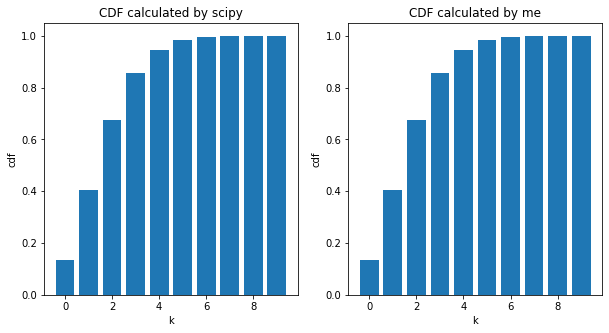

In [12]:
from scipy.stats import poisson
lambda_ = 2
k=range(10)

cdf_X = poisson.cdf(k, lambda_)
# we can do it ourselves using the pmf
pmf_X = poisson.pmf(k, lambda_)
my_cdf_X = [pmf_X[0]]
for i in range(1, 10):
    my_cdf_X.append(my_cdf_X[i-1] + pmf_X[i])

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].bar(k, cdf_X)
ax[0].set_ylabel("cdf")
ax[0].set_xlabel("k")
ax[0].set_title("CDF calculated by scipy")

ax[1].bar(k, my_cdf_X)
ax[1].set_ylabel("cdf")
ax[1].set_xlabel("k")
ax[1].set_title("CDF calculated by me")

plt.show()

---

## Continuous random variables

> A random variable $X$ is _continuous_ if for some function $f:\mathbb{R} \to \mathbb{R}$ and for any numbers $a$ and $b$ with $a \leq b$,
>
> $P(a\leq X \leq b) = \int_a^bf(x) \,dx$.
> 
> The function $f$ has to satisfy $f(x) \geq 0$ for all $x$ and $\int_{-\infty}^{\infty}f(x) \,dx=1$
>
> We call $f$ the probability density function (pdf) of X.

Examples:
* height of a person
* how much weight a bridge can hold
* price of a car

### Normal (Gaussian) distribution

Description
: One of the most important distributions in probability theory and statistics since, among other things, it can model measurement errors and the average of any other distribution.

Example
: Height of a person can be approximated as a normal distribution.

Notation
: $N( \mu, \sigma^2)$

Parameters:
* $\mu \in \mathbb{R}$ (mean, location)
* $\sigma^2 > 0$ (variance, squared standard deviation. In scikit, this is the square of the scale parameter.)

Support (values of X)
: $x \in \mathbb{R}$

pdf
: $\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$
  
Mean
: $\mu$ 

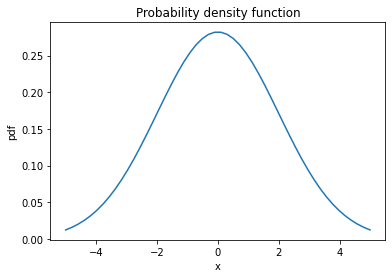

In [13]:
from scipy.stats import norm
import numpy as np

mu = 0
sigma = 2
x = np.linspace(-5, 5)
pdf_X = norm.pdf(x, mu, sigma)
def gaussian_pdf(x, mu, sigma):
    return 1/(sigma*np.sqrt(np.pi)) * np.e**(-1/2*((x-mu)/sigma)**2)
my_pdf_X = [gaussian_pdf(a, mu, sigma) for a in x]

fig, ax = plt.subplots(1, 1)
ax.plot(x, my_pdf_X)
plt.ylabel("pdf")
plt.xlabel("x")
plt.title("Probability density function")
plt.show()

If we are interested int the probability that a value is up to and including $x$ ($P(X \leq x)$), we can plot the _cumulative distribution function_:

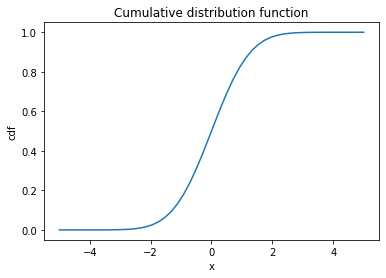

In [14]:
from scipy.stats import norm
import numpy as np
mu = 0
sigma = 1
x = np.linspace(-5, 5)
cdf_X = norm.cdf(x, mu, sigma)

fig, ax = plt.subplots(1, 1)
ax.plot(x, cdf_X)
plt.ylabel("cdf")
plt.xlabel("x")
plt.title("Cumulative distribution function")
plt.show()

---
**Give it a try!**

Grades at an exam follow the distribution $N( 5, 1.5^2)$. What percentage of students failed the exam if the minimum grade to pass is 4?

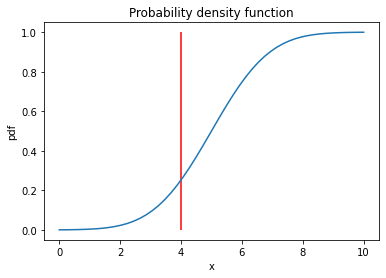

Probability students will fail = 0.2524925375469229


In [15]:
# Your code here
from scipy.stats import norm
import numpy as np
mu = 5
sigma = 1.5
x = np.linspace(0, 10)
cdf_X = norm.cdf(x, mu, sigma)

fig, ax = plt.subplots(1, 1)
ax.plot(x, cdf_X)
ax.vlines(4, 0, max(cdf_X), colors='red')
plt.ylabel("pdf")
plt.xlabel("x")
plt.title("Probability density function")
plt.show()

print(f"Probability students will fail = {norm.cdf(4, mu, sigma)}")

Expected result: ~0.252

---

## Expectation

> The _expectation_ of a discrete random variable $X$ taking the values $a_1, a_2,...$ and with probability mass function $p$ is the number
>
> $\displaystyle E[X] = \sum_i a_iP(X = a_i) = \sum_i a_ip(a_i)$

Also called _mean_ or _expected value_.

mean is 2.0


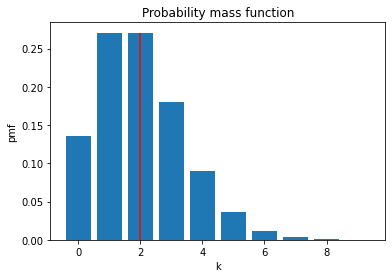

In [16]:
from scipy.stats import poisson
import numpy as np
lambda_ = 2
k=range(10)

pmf_X = poisson.pmf(k, lambda_)
mean = poisson.mean(lambda_)
print('mean is', mean)

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_X)
ax.vlines(mean, 0, max(pmf_X), colors='red')
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

---
**Give it a try!**

What is the mean of the random variable $X$ with the corresponding pmf below?

In [17]:
X = {'A': 1, 'B': 2, 'C': 3}
k = [1, 2, 3]
pmf_X=[0.2, 0.2, 0.6]
# Your code here

print(f"E[X] = {sum([k[i]*pmf_X[i] for i in range(3)])}")

E[X] = 2.4


Expected result: 2.4

---

> The _expectation_ of a continuous random variable $X$ with probability density function $f$ is the number
>
> $E[X] = \int_{- \infty}^{\infty} xf(x) \,dx$

mean is 7.0


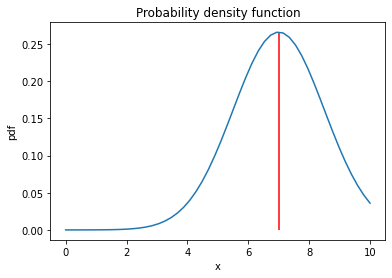

In [18]:
from scipy.stats import norm
import numpy as np
mu = 7
sigma = 1.5
x = np.linspace(0, 10)
pdf_X = norm.pdf(x, mu, sigma)

mean = norm.mean(mu, sigma)
print('mean is', mean)

fig, ax = plt.subplots(1, 1)
ax.plot(x, pdf_X)
ax.vlines(mean, 0, max(pdf_X), colors='red')
plt.ylabel("pdf")
plt.xlabel("x")
plt.title("Probability density function")
plt.show()

Properties:
* $E[aX+b] = aE[X]+b$ with $a, b \in \mathbb{R}$ ("change of unit" formula)
* $E[X+Y] = E[X] + E[Y]$
* $E[g(X)] = \sum_ig(a_i)P(X=a_i)$ where X is a discrete variable taking the values $a_1, a_2,...$ and $g$ is a function $g:\mathbb{R} \to \mathbb{R}$ ("change of variable" formula)

---

**Give it a try!**

Prove the first property

*Answer*: We will prove for discrete variables; the proof is similar for the continuous case.

1. $\displaystyle E[aX + b] = \sum_{x \in Val(X)} (a\cdot x + b) \cdot p(x) = \sum_{x \in Val(X)} a\cdot x \cdot p(x) + \sum_{x \in Val(X)} b \cdot p(x) = a \sum_{x \in Val(X)} x \cdot p(x) + b \sum_{x \in Val(X)} p(x) = a\cdot E[X] + b$
---

## Variance and standard deviation

> The _variance_ Var(X) of a random variable $X$ is the number
>
> $Var(X) = E[(X-E[X])^2]$

Variance is a measure of the spread of the data.

In [19]:
from scipy.stats import poisson
lambda_ = 2

var = poisson.var(lambda_)
print('variance is', var)

variance is 2.0


The _standard deviation_ is simply the square root of variance, representing the spread of data in normal units:

$\sigma = \sqrt{Var(X)}$

Properties:
* $Var(aX +b) = a^2Var(X)$
* $Var(X) = E[X^2] - E^2[X]$
* $Var(X+Y) = Var(X) + Var(Y)$ - only for independent variables.

---

**Give it a try!**

Prove the first two properties.

*Answer*: For the two proofs we will use the definition of variance and the first property of the expectation.

1. $Var[aX + b] = E[(aX + b - E[aX + b])^2] = E[(aX + b - aE[X] - b)^2] = E[(a(X-E[X]))^2] = E[a^2 \cdot (X-E[X])^2] = a^2 E[(X-E[X])^2] = a^2 Var[X]$

2. $Var[X] = E[(X-E[X])^2] = E[X^2 - 2\cdot X\cdot E[X] + E^2[X]] = E[X^2] - 2\cdot E[X\cdot E[X]] + E[E^2[X]] = E[X^2] - 2\cdot E[X]E[X] + E^2[X] = E[X^2] - E^2[X]$

What is the mean and the variance of the random variable $X$ with the corresponding pmf below?

---

In [20]:
X = {'A': 1, 'B': 2, 'C': 10, 'D':12, 'E' : 15}
k = list(X.values())
pmf_X=[0.1, 0.2, 0.3, 0.15, 0.25]
# Your code here
e_x = sum([ki*pmf_X[i] for i, ki in enumerate(k)])
var_x = sum([(ki-e_x)**2*pmf_X[i] for i, ki in enumerate(k)])
print(f"E[X] = {e_x}")
print(f"Var[X] = {var_x}")

E[X] = 9.05
Var[X] = 26.8475
